In [ ]:
#reference->https://medium.com/@AB_Niazi/multiimage-classification-resnet-50-from-scratch-4ce3ec4e94b0

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
! pip install split-folders

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [7]:
#Importing images
real_Images = glob.glob('C:\\Users\\khyat\\Downloads\\ffhq\\*\\*.png')
print("Total Number of Images", len(real_Images))
real_Images = pd.Series(real_Images)



Total Number of Images 52001


In [8]:
fake_Images = glob.glob('C:\\Users\\khyat\\Downloads\\data\\*\\*.png')
print("Total Number of Images", len(fake_Images))
fake_Images = pd.Series(fake_Images)

Total Number of Images 24999


In [9]:
#printing filename and class of each image for real images
real_Df = pd.DataFrame()

real_Df['FileName'] = real_Images.map(lambda ImageName :ImageName.split("H")[-1])

real_Df['ClassId'] = real_Images.map(lambda ImageName :'real')

real_Df

FileName ClassId
0      C:\Users\khyat\Downloads\ffhq\1\00000.png    real
1      C:\Users\khyat\Downloads\ffhq\1\00001.png    real
2      C:\Users\khyat\Downloads\ffhq\1\00002.png    real
3      C:\Users\khyat\Downloads\ffhq\1\00003.png    real
4      C:\Users\khyat\Downloads\ffhq\1\00004.png    real
...                                          ...     ...
51996  C:\Users\khyat\Downloads\ffhq\1\53996.png    real
51997  C:\Users\khyat\Downloads\ffhq\1\53997.png    real
51998  C:\Users\khyat\Downloads\ffhq\1\53998.png    real
51999  C:\Users\khyat\Downloads\ffhq\1\53999.png    real
52000  C:\Users\khyat\Downloads\ffhq\1\54000.png    real

[52001 rows x 2 columns]

In [10]:
#printing filename and class of each image for GAN images
fake_Df = pd.DataFrame()

fake_Df['FileName'] = fake_Images.map(lambda ImageName :ImageName.split("H")[-1])

fake_Df['ClassId'] = fake_Images.map(lambda ImageName :'fake')

fake_Df

FileName ClassId
0      C:\Users\khyat\Downloads\data\gan\000004.png    fake
1      C:\Users\khyat\Downloads\data\gan\000014.png    fake
2      C:\Users\khyat\Downloads\data\gan\000016.png    fake
3      C:\Users\khyat\Downloads\data\gan\000021.png    fake
4      C:\Users\khyat\Downloads\data\gan\000027.png    fake
...                                             ...     ...
24994  C:\Users\khyat\Downloads\data\gan\099977.png    fake
24995  C:\Users\khyat\Downloads\data\gan\099984.png    fake
24996  C:\Users\khyat\Downloads\data\gan\099986.png    fake
24997  C:\Users\khyat\Downloads\data\gan\099987.png    fake
24998  C:\Users\khyat\Downloads\data\gan\099989.png    fake

[24999 rows x 2 columns]

In [11]:
Total_Df = real_Df.append(fake_Df, ignore_index=True)

C:\Users\khyat\AppData\Local\Temp\ipykernel_5012\657147300.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total_Df = real_Df.append(fake_Df, ignore_index=True)


In [12]:
Total_Df

FileName ClassId
0         C:\Users\khyat\Downloads\ffhq\1\00000.png    real
1         C:\Users\khyat\Downloads\ffhq\1\00001.png    real
2         C:\Users\khyat\Downloads\ffhq\1\00002.png    real
3         C:\Users\khyat\Downloads\ffhq\1\00003.png    real
4         C:\Users\khyat\Downloads\ffhq\1\00004.png    real
...                                             ...     ...
76995  C:\Users\khyat\Downloads\data\gan\099977.png    fake
76996  C:\Users\khyat\Downloads\data\gan\099984.png    fake
76997  C:\Users\khyat\Downloads\data\gan\099986.png    fake
76998  C:\Users\khyat\Downloads\data\gan\099987.png    fake
76999  C:\Users\khyat\Downloads\data\gan\099989.png    fake

[77000 rows x 2 columns]

In [13]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

real    52001
fake    24999
Name: ClassId, dtype: int64

In [14]:
#EDA

fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()




In [15]:

fig=px.pie(Class_Id_Dist_Total.head(10),values= 'ClassId', names=Total_Df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [16]:
Total_Df = Total_Df.sample(frac = 1)
Total_Df

FileName ClassId
10467     C:\Users\khyat\Downloads\ffhq\1\12467.png    real
38915     C:\Users\khyat\Downloads\ffhq\1\40915.png    real
72529  C:\Users\khyat\Downloads\data\gan\081952.png    fake
33977     C:\Users\khyat\Downloads\ffhq\1\35977.png    real
56777  C:\Users\khyat\Downloads\data\gan\019232.png    fake
...                                             ...     ...
53908  C:\Users\khyat\Downloads\data\gan\007733.png    fake
65096  C:\Users\khyat\Downloads\data\gan\051959.png    fake
56026  C:\Users\khyat\Downloads\data\gan\016196.png    fake
18391     C:\Users\khyat\Downloads\ffhq\1\20391.png    real
55118  C:\Users\khyat\Downloads\data\gan\012511.png    fake

[77000 rows x 2 columns]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Splitting the data into train and test
x, x_test, y, y_test = train_test_split(Total_Df,Total_Df['ClassId'],test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)


In [20]:
x_train

FileName ClassId
42857     C:\Users\khyat\Downloads\ffhq\1\44857.png    real
24557     C:\Users\khyat\Downloads\ffhq\1\26557.png    real
71630  C:\Users\khyat\Downloads\data\gan\078218.png    fake
76697  C:\Users\khyat\Downloads\data\gan\098735.png    fake
63203  C:\Users\khyat\Downloads\data\gan\044670.png    fake
...                                             ...     ...
56185  C:\Users\khyat\Downloads\data\gan\016802.png    fake
37919     C:\Users\khyat\Downloads\ffhq\1\39919.png    real
8815      C:\Users\khyat\Downloads\ffhq\1\08815.png    real
35512     C:\Users\khyat\Downloads\ffhq\1\37512.png    real
32860     C:\Users\khyat\Downloads\ffhq\1\34860.png    real

[46200 rows x 2 columns]

In [21]:
Total_Df['ClassId']

10467    real
38915    real
72529    fake
33977    real
56777    fake
         ... 
53908    fake
65096    fake
56026    fake
18391    real
55118    fake
Name: ClassId, Length: 77000, dtype: object

In [22]:
train_df = x_train
test_df = x_test
val_df = x_cv

In [23]:
train_df

FileName ClassId
42857     C:\Users\khyat\Downloads\ffhq\1\44857.png    real
24557     C:\Users\khyat\Downloads\ffhq\1\26557.png    real
71630  C:\Users\khyat\Downloads\data\gan\078218.png    fake
76697  C:\Users\khyat\Downloads\data\gan\098735.png    fake
63203  C:\Users\khyat\Downloads\data\gan\044670.png    fake
...                                             ...     ...
56185  C:\Users\khyat\Downloads\data\gan\016802.png    fake
37919     C:\Users\khyat\Downloads\ffhq\1\39919.png    real
8815      C:\Users\khyat\Downloads\ffhq\1\08815.png    real
35512     C:\Users\khyat\Downloads\ffhq\1\37512.png    real
32860     C:\Users\khyat\Downloads\ffhq\1\34860.png    real

[46200 rows x 2 columns]

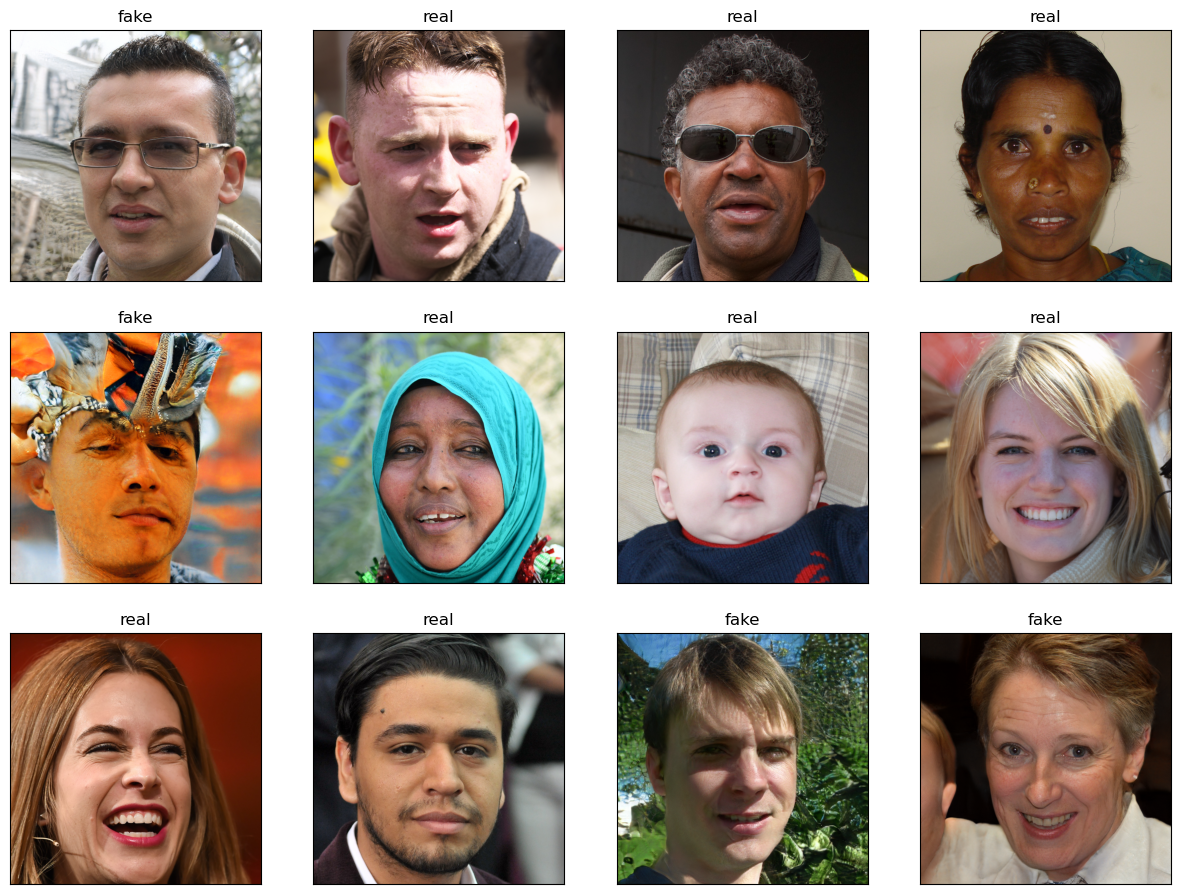

In [24]:
#Displaying images
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'FileName']
    #print(img_name)
    label_str = (plot_df.loc[i, 'ClassId'])
    #print(label_str)
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(img_name))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

In [25]:
from tensorflow.keras.optimizers.legacy import Adam

In [26]:
#Image data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_dataframe(train_df,x_col='FileName',
    y_col='ClassId',target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_dataframe(test_df,x_col='FileName',
    y_col='ClassId',target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_dataframe(val_df,x_col='FileName',
    y_col='ClassId',target_size=(224,224),batch_size=32,shuffle=False)

Found 46200 validated image filenames belonging to 2 classes.
Found 15400 validated image filenames belonging to 2 classes.
Found 15400 validated image filenames belonging to 2 classes.


In [27]:
train_df['FileName']

42857       C:\Users\khyat\Downloads\ffhq\1\44857.png
24557       C:\Users\khyat\Downloads\ffhq\1\26557.png
71630    C:\Users\khyat\Downloads\data\gan\078218.png
76697    C:\Users\khyat\Downloads\data\gan\098735.png
63203    C:\Users\khyat\Downloads\data\gan\044670.png
                             ...                     
56185    C:\Users\khyat\Downloads\data\gan\016802.png
37919       C:\Users\khyat\Downloads\ffhq\1\39919.png
8815        C:\Users\khyat\Downloads\ffhq\1\08815.png
35512       C:\Users\khyat\Downloads\ffhq\1\37512.png
32860       C:\Users\khyat\Downloads\ffhq\1\34860.png
Name: FileName, Length: 46200, dtype: object

In [28]:
#Resnet50 with identity block
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [29]:
#Resnet50 with convolutional block
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [30]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [31]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [32]:
#resnet50 with with last layer as the custom layer-dense layer
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [33]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [31]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94765736/94765736 [==============================] - 3s 0us/step


In [32]:
for layers in modelT.layers:
    layers.trainable = False

In [33]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(2, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

The my_model.h5 is trained by us for 10 epochs initially as it was taking 2 hours for 1 epoch, we did this for poster presentaion. 
After that for the report, we loaded the save model that had been run for 10 epochs.
We ran 20 more epochs on that model to improve the accuracy.
Ideally 50 epochs are required for a good performance of the model as there are many layers and it takes time to train. But due to computational and time constraint, we ran this for 30 epochs in total

In [37]:
#Training the model
from keras import models
modelT = models.load_model('my_model.h5')

<span style="font-family:cursive;font-size:15px;">  A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). </span>

<span style="font-family:cursive;font-size:15px;">  Early Stopping is use to prevent model from over fitting. </span>

In [38]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [39]:
mc = ModelCheckpoint('./kaggle/working/model.h5', monitor='val_accuracy', mode='max' )

In [40]:
History = modelT.fit(train_generator,validation_data=val_generator,epochs=10,verbose=1, callbacks=[mc,es])

Epoch 1/10
1444/1444 [==============================] - 5479s 4s/step - loss: 11.2251 - accuracy: 0.8037 - val_loss: 15.4261 - val_accuracy: 0.7371
Epoch 2/10
1444/1444 [==============================] - 4903s 3s/step - loss: 11.4352 - accuracy: 0.8036 - val_loss: 6.9832 - val_accuracy: 0.8489
Epoch 3/10
1444/1444 [==============================] - 5092s 4s/step - loss: 11.4271 - accuracy: 0.8076 - val_loss: 9.9666 - val_accuracy: 0.8095
Epoch 4/10
1444/1444 [==============================] - 5238s 4s/step - loss: 11.3134 - accuracy: 0.8094 - val_loss: 6.8793 - val_accuracy: 0.8574
Epoch 5/10
1444/1444 [==============================] - 5231s 4s/step - loss: 11.5239 - accuracy: 0.8079 - val_loss: 12.1383 - val_accuracy: 0.7895
Epoch 6/10
1444/1444 [==============================] - 5199s 4s/step - loss: 11.6606 - accuracy: 0.8110 - val_loss: 6.8565 - val_accuracy: 0.8600
Epoch 7/10
1444/1444 [==============================] - 4907s 3s/step - loss: 11.5802 - accuracy: 0.8124 - val_loss:

In [41]:
from keras.models import load_model

modelT.save('my_model1.h5')

In [42]:
History = modelT.fit(train_generator,validation_data=val_generator,epochs=10,verbose=1, callbacks=[mc,es])

Epoch 1/10
1444/1444 [==============================] - 5102s 4s/step - loss: 12.0055 - accuracy: 0.8164 - val_loss: 5.6537 - val_accuracy: 0.8808
Epoch 2/10
1444/1444 [==============================] - 5222s 4s/step - loss: 11.7283 - accuracy: 0.8182 - val_loss: 6.5745 - val_accuracy: 0.8656
Epoch 3/10
1444/1444 [==============================] - 5201s 4s/step - loss: 11.8068 - accuracy: 0.8181 - val_loss: 7.5905 - val_accuracy: 0.8571
Epoch 4/10
1444/1444 [==============================] - 5165s 4s/step - loss: 11.9546 - accuracy: 0.8166 - val_loss: 9.6946 - val_accuracy: 0.8298
Epoch 5/10
1444/1444 [==============================] - 4893s 3s/step - loss: 11.9616 - accuracy: 0.8176 - val_loss: 7.4673 - val_accuracy: 0.8592
Epoch 6/10
1444/1444 [==============================] - 5240s 4s/step - loss: 12.1769 - accuracy: 0.8188 - val_loss: 9.6868 - val_accuracy: 0.8318
Epoch 7/10
1444/1444 [==============================] - 5270s 4s/step - loss: 12.1459 - accuracy: 0.8191 - val_loss: 6

In [57]:
modelT.save('Resnet50-30epo.h5')

Plotting the Graph and Result

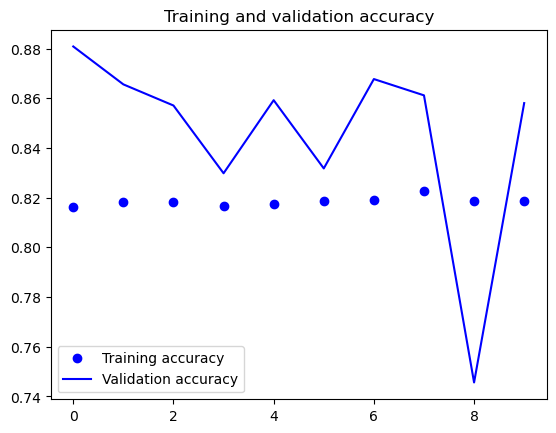

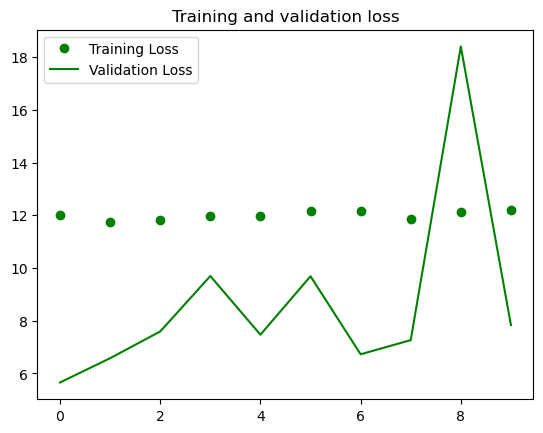

In [56]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
#Prediction 
test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

482/482 [==============================] - 1261s 3s/step - loss: 8.0986 - accuracy: 0.8555
Loss: 809.865
Accuracy: 85.545


In [44]:
from sklearn.metrics import classification_report

In [45]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

482/482 [==============================] - 1052s 2s/step


In [46]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      4918
           1       0.96      0.82      0.89     10482

    accuracy                           0.86     15400
   macro avg       0.83      0.87      0.84     15400
weighted avg       0.88      0.86      0.86     15400



In [47]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [48]:
filenames = test_generator.filenames

In [49]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

filename actual predicted   Same
0  C:\Users\khyat\Downloads\data\gan\089967.png   fake      fake   True
1     C:\Users\khyat\Downloads\ffhq\1\43441.png   real      real   True
2     C:\Users\khyat\Downloads\ffhq\1\08713.png   real      real   True
3     C:\Users\khyat\Downloads\ffhq\1\53764.png   real      real   True
4  C:\Users\khyat\Downloads\data\gan\041990.png   fake      fake   True
5     C:\Users\khyat\Downloads\ffhq\1\38062.png   real      real   True
6  C:\Users\khyat\Downloads\data\gan\020011.png   fake      fake   True
7     C:\Users\khyat\Downloads\ffhq\1\20134.png   real      fake  False
8     C:\Users\khyat\Downloads\ffhq\1\48376.png   real      fake  False
9  C:\Users\khyat\Downloads\data\gan\043987.png   fake      fake   True

In [46]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [53]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [54]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[4534  384]
 [1842 8640]]


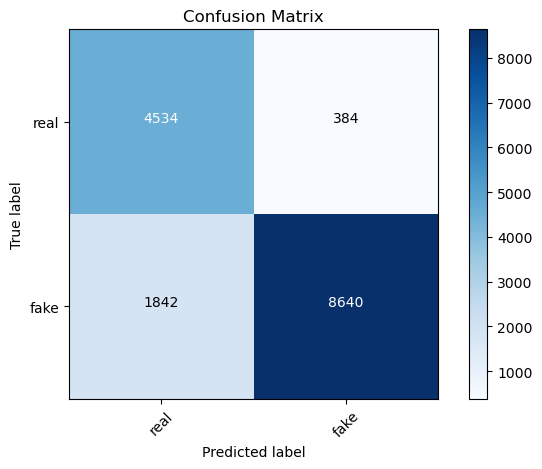

In [55]:
cm_plot_labels = ['real','fake']
#confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')